# Regressão Carros Usados no Reino Unido
**Objetivo**: Prever preço de carros usados no Reino Unido

## Preparação
Limpeza e Tratamento de Dados

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('dados/used_cars_UK.csv')

In [3]:
data.head()

,Unnamed: 0,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,0,SKODA Fabia,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,1,Vauxhall Corsa,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,2,Hyundai i30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,3,MINI Hatch,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,4,Vauxhall Corsa,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [4]:
data.shape

(3685, 14)

In [5]:
# Verifica quantos NaN tem em cada coluna
data.isnull().sum()

Unnamed: 0              0
title                   0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1409
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3145
dtype: int64

### Limpar variaveis que não serão utilizadas

In [6]:
data = data.drop(['Unnamed: 0', 'title'], axis = 1)

In [7]:
data.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


### Tratamento de 'Previous Owners'

In [8]:
data.groupby(['Previous Owners']).size()

Previous Owners
1.0    523
2.0    594
3.0    475
4.0    360
5.0    208
6.0     60
7.0     39
8.0     12
9.0      5
dtype: int64

In [9]:
# Substitui carros que não especificam o número de donos por 1
data['Previous Owners'].fillna(1, inplace = True)

In [10]:
data.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,949,137000,2011,1.0,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,1000,85000,2013,1.0,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [11]:
data.isnull().sum()

Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners         0
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3145
dtype: int64

### Tratamento de Fuel type

In [12]:
data.groupby(['Fuel type']).size()

Fuel type
Diesel                   1218
Diesel Hybrid               1
Electric                   31
Petrol                   2361
Petrol Hybrid              47
Petrol Plug-in Hybrid      27
dtype: int64

In [13]:
# Padronização
data.loc[data['Fuel type'] == 'Diesel Hybrid', 'Fuel type'] = 'Diesel'
data.loc[data['Fuel type'].isin(['Electric', 'Petrol Hybrid', 'Petrol Plug-in Hybrid']), 'Fuel type'] = 'Petrol'

In [14]:
data.groupby(['Fuel type']).size()

Fuel type
Diesel    1219
Petrol    2466
dtype: int64

In [15]:
data.loc[data['Fuel type'] == 'Diesel', 'Fuel type'] = 0
data.loc[data['Fuel type'] == 'Petrol', 'Fuel type'] = 1

In [16]:
data.groupby(['Fuel type']).size()

Fuel type
0    1219
1    2466
dtype: int64

In [17]:
data.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,6900,70189,2016,3.0,0,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,1495,88585,2008,4.0,1,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,949,137000,2011,1.0,1,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,2395,96731,2010,5.0,1,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,1000,85000,2013,1.0,0,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


### Decidi não tratar 'Body type' para testar variaveis categoricas com os modelos

In [18]:
data.groupby(['Body type']).size()

Body type
Combi Van         2
Convertible     109
Coupe           139
Estate          171
Hatchback      2279
MPV             153
Minibus           1
Pickup            3
SUV             460
Saloon          368
dtype: int64

### Tratamento de 'Engine'

In [19]:
data.groupby(['Engine']).size()

Engine
0.8L      2
0.9L     15
1.0L    326
1.1L     39
1.2L    521
1.3L    170
1.4L    421
1.5L    294
1.6L    734
1.7L     35
1.8L    158
1.9L     31
2.0L    553
2.1L     63
2.2L     75
2.3L      4
2.4L     28
2.5L     33
2.6L      4
2.7L     11
2.8L      3
3.0L     79
3.1L      1
3.2L      7
3.3L      1
3.5L     10
3.7L      5
4.2L      4
4.3L      2
4.4L      5
4.8L      1
5.0L      3
5.5L      1
6.3L      1
dtype: int64

In [20]:
data['Engine'].isnull().sum()

45

In [21]:
data['Engine'] = data['Engine'].str.replace('L', '')

In [22]:
data.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,6900,70189,2016,3.0,0,Hatchback,1.4,Manual,5.0,5.0,Euro 6,NaN
1,1495,88585,2008,4.0,1,Hatchback,1.2,Manual,3.0,5.0,Euro 4,Full
2,949,137000,2011,1.0,1,Hatchback,1.4,Manual,5.0,5.0,Euro 5,NaN
3,2395,96731,2010,5.0,1,Hatchback,1.4,Manual,3.0,4.0,Euro 4,Full
4,1000,85000,2013,1.0,0,Hatchback,1.3,Manual,5.0,5.0,Euro 5,NaN


In [23]:
data['Engine'].describe()

count     3640
unique      34
top        1.6
freq       734
Name: Engine, dtype: object

In [24]:
data['Engine'] = pd.to_numeric(data['Engine'])

In [25]:
data['Engine'].describe()

count    3640.000000
mean        1.606264
std         0.486718
min         0.800000
25%         1.300000
50%         1.600000
75%         1.900000
max         6.300000
Name: Engine, dtype: float64

In [26]:
data['Engine'].mode()

0    1.6
Name: Engine, dtype: float64

In [27]:
data['Engine'].fillna(1.6, inplace = True)

In [28]:
data.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,6900,70189,2016,3.0,0,Hatchback,1.4,Manual,5.0,5.0,Euro 6,NaN
1,1495,88585,2008,4.0,1,Hatchback,1.2,Manual,3.0,5.0,Euro 4,Full
2,949,137000,2011,1.0,1,Hatchback,1.4,Manual,5.0,5.0,Euro 5,NaN
3,2395,96731,2010,5.0,1,Hatchback,1.4,Manual,3.0,4.0,Euro 4,Full
4,1000,85000,2013,1.0,0,Hatchback,1.3,Manual,5.0,5.0,Euro 5,NaN


### Tratamento de 'Gearbox'

In [29]:
data.groupby(['Gearbox']).size()

Gearbox
Automatic     817
Manual       2868
dtype: int64

In [30]:
data.loc[data['Gearbox'] == 'Automatic', 'Gearbox'] = 0
data.loc[data['Gearbox'] == 'Manual', 'Gearbox'] = 1

In [31]:
data.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,6900,70189,2016,3.0,0,Hatchback,1.4,1,5.0,5.0,Euro 6,NaN
1,1495,88585,2008,4.0,1,Hatchback,1.2,1,3.0,5.0,Euro 4,Full
2,949,137000,2011,1.0,1,Hatchback,1.4,1,5.0,5.0,Euro 5,NaN
3,2395,96731,2010,5.0,1,Hatchback,1.4,1,3.0,4.0,Euro 4,Full
4,1000,85000,2013,1.0,0,Hatchback,1.3,1,5.0,5.0,Euro 5,NaN


### Tratamento de 'Doors'

In [32]:
data.groupby(['Doors']).size()

Doors
2.0     216
3.0     735
4.0     367
5.0    2342
dtype: int64

In [33]:
data['Doors'].isnull().sum()

25

In [34]:
data['Doors'].fillna(5, inplace = True)

In [35]:
data.groupby(['Doors']).size()

Doors
2.0     216
3.0     735
4.0     367
5.0    2367
dtype: int64

In [36]:
data.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,6900,70189,2016,3.0,0,Hatchback,1.4,1,5.0,5.0,Euro 6,NaN
1,1495,88585,2008,4.0,1,Hatchback,1.2,1,3.0,5.0,Euro 4,Full
2,949,137000,2011,1.0,1,Hatchback,1.4,1,5.0,5.0,Euro 5,NaN
3,2395,96731,2010,5.0,1,Hatchback,1.4,1,3.0,4.0,Euro 4,Full
4,1000,85000,2013,1.0,0,Hatchback,1.3,1,5.0,5.0,Euro 5,NaN


### Tratamento de 'Seats'

In [37]:
data.groupby(['Seats']).size()

Seats
2.0      25
3.0       2
4.0     531
5.0    2967
6.0       4
7.0     121
dtype: int64

In [38]:
data['Seats'].isnull().sum()

35

In [39]:
data['Seats'].fillna(5, inplace = True)

In [40]:
data.groupby(['Seats']).size()

Seats
2.0      25
3.0       2
4.0     531
5.0    3002
6.0       4
7.0     121
dtype: int64

In [41]:
data.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,6900,70189,2016,3.0,0,Hatchback,1.4,1,5.0,5.0,Euro 6,NaN
1,1495,88585,2008,4.0,1,Hatchback,1.2,1,3.0,5.0,Euro 4,Full
2,949,137000,2011,1.0,1,Hatchback,1.4,1,5.0,5.0,Euro 5,NaN
3,2395,96731,2010,5.0,1,Hatchback,1.4,1,3.0,4.0,Euro 4,Full
4,1000,85000,2013,1.0,0,Hatchback,1.3,1,5.0,5.0,Euro 5,NaN


### Tratamento de 'Emission Class'

In [42]:
data.groupby(['Emission Class']).size()

Emission Class
Euro 1       4
Euro 2      25
Euro 3     137
Euro 4    1068
Euro 5    1256
Euro 6    1108
dtype: int64

In [43]:
data['Emission Class'].isnull().sum()

87

In [44]:
data['Emission Class'].fillna('Euro 5', inplace = True)

In [45]:
data['Emission Class'].isnull().sum()

0

In [46]:
data.head()

,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,6900,70189,2016,3.0,0,Hatchback,1.4,1,5.0,5.0,Euro 6,NaN
1,1495,88585,2008,4.0,1,Hatchback,1.2,1,3.0,5.0,Euro 4,Full
2,949,137000,2011,1.0,1,Hatchback,1.4,1,5.0,5.0,Euro 5,NaN
3,2395,96731,2010,5.0,1,Hatchback,1.4,1,3.0,4.0,Euro 4,Full
4,1000,85000,2013,1.0,0,Hatchback,1.3,1,5.0,5.0,Euro 5,NaN


### Tratamento de 'Service history'

In [47]:
data.groupby(['Service history']).size()

Service history
Full    540
dtype: int64

In [48]:
data['Service history'].isnull().sum()

3145

In [49]:
data.loc[data['Service history'] == 'Full', 'Service history'] = 1

In [50]:
data['Service history'].fillna(0, inplace = True)

In [51]:
data.groupby(['Service history']).size()

Service history
0    3145
1     540
dtype: int64

### Tabela Tratada

In [52]:
data.columns = ['Price', 'Mileage(miles)', 'Registration Year', 'Previous Owners', 'Fuel Type', 'Body Type', 'Engine', 'Gearbox', 'Doors', 'Seats', 'Emission Class', 'Service History']

In [53]:
data.head()

,Price,Mileage(miles),Registration Year,Previous Owners,Fuel Type,Body Type,Engine,Gearbox,Doors,Seats,Emission Class,Service History
0,6900,70189,2016,3.0,0,Hatchback,1.4,1,5.0,5.0,Euro 6,0
1,1495,88585,2008,4.0,1,Hatchback,1.2,1,3.0,5.0,Euro 4,1
2,949,137000,2011,1.0,1,Hatchback,1.4,1,5.0,5.0,Euro 5,0
3,2395,96731,2010,5.0,1,Hatchback,1.4,1,3.0,4.0,Euro 4,1
4,1000,85000,2013,1.0,0,Hatchback,1.3,1,5.0,5.0,Euro 5,0


## Regressão

In [54]:
from pycaret.regression import *

In [55]:
s = setup(data, target = 'Price')

,Description,Value
0,Session id,7775
1,Target,Price
2,Target type,Regression
3,Original data shape,"(3685, 12)"
4,Transformed data shape,"(3685, 25)"
5,Transformed train set shape,"(2579, 25)"
6,Transformed test set shape,"(1106, 25)"
7,Ordinal features,2
8,Numeric features,7
9,Categorical features,4


In [56]:
best = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:15:54
Status,. . . . . . . . . . . . . . . . . .,Loading Estimator
Estimator,. . . . . . . . . . . . . . . . . .,Linear Regression


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,936.9609,2350944.0064,1524.4577,0.8813,0.2989,0.2291,0.1240
gbr,Gradient Boosting Regressor,1049.3404,2476759.2002,1564.0683,0.8756,0.3224,0.2648,0.1020
rf,Random Forest Regressor,924.1959,2557193.3066,1583.1106,0.8721,0.3008,0.2226,0.2420
et,Extra Trees Regressor,957.6600,2768687.7956,1650.1895,0.8601,0.3163,0.2331,0.1930
dt,Decision Tree Regressor,1231.6124,4349109.2243,2074.1111,0.7804,0.4025,0.2921,0.0470
br,Bayesian Ridge,1512.4379,5618844.4397,2327.1997,0.7185,0.5183,0.3798,0.0380
ridge,Ridge Regression,1514.0319,5626529.3643,2328.0921,0.7181,0.5259,0.3805,0.0380
lasso,Lasso Regression,1514.3582,5639088.3426,2330.4983,0.7174,0.5199,0.3804,0.0430
llar,Lasso Least Angle Regression,1514.3605,5639082.7965,2330.4981,0.7174,0.5200,0.3804,0.0470
lr,Linear Regression,1516.6115,5643478.8598,2330.9051,0.7171,0.5278,0.3812,0.6450


In [57]:
best

LGBMRegressor(n_jobs=-1, random_state=7775)

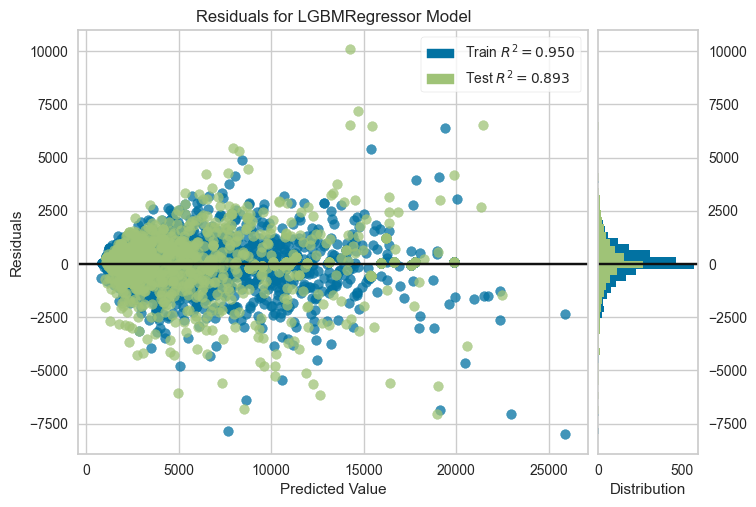

In [58]:
plot_model(best, plot='residuals')

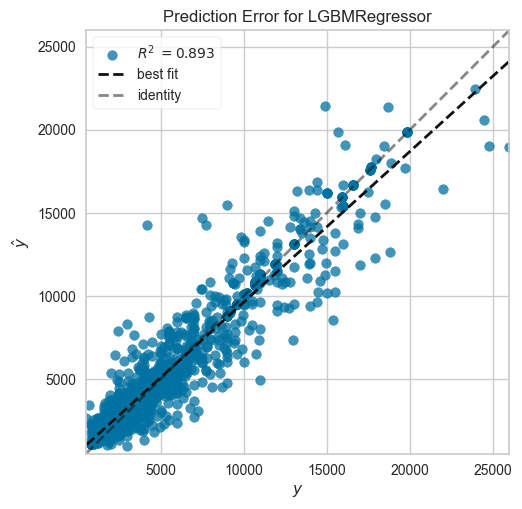

In [59]:
plot_model(best, plot='error')

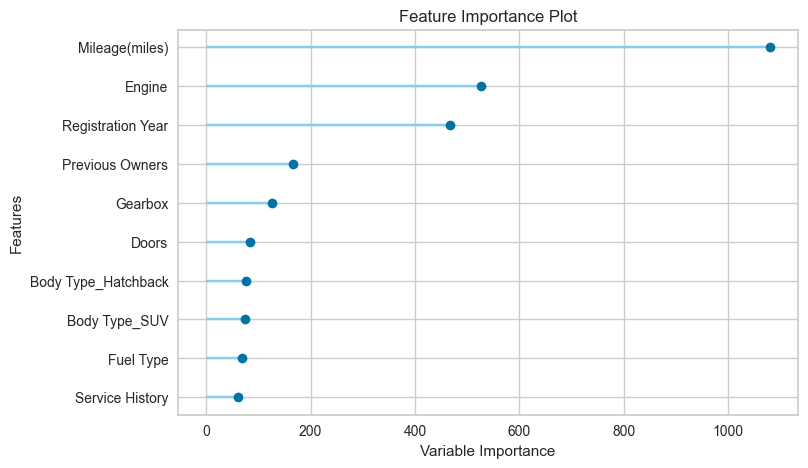

In [60]:
plot_model(best, plot='feature')

In [ ]:
previsoes = predict_model(best)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,989.2009,2655092.8620,1629.4456,0.8742,0.3076,0.2356


In [ ]:
previsoes.head()

,Mileage(miles),Registration Year,Previous Owners,Fuel Type,Body Type,Engine,Gearbox,Doors,Seats,Emission Class,Service History,Price,prediction_label
2260,78033,2015,1.0,1,Hatchback,1.2,1,3.0,4.0,Euro 6,0,4250,4844.510722
1606,47988,2009,1.0,1,Hatchback,1.2,1,3.0,5.0,Euro 4,0,2995,2885.981345
3292,70984,2013,8.0,1,Hatchback,1.4,1,3.0,4.0,Euro 5,0,1295,4545.876491
449,130422,2009,4.0,1,Hatchback,1.4,1,3.0,4.0,Euro 4,0,2920,1993.255093
1593,91000,2019,1.0,1,Hatchback,1.5,1,5.0,5.0,Euro 6,1,10970,11043.900147


In [ ]:
previsoes.reset_index(inplace=True, drop=True)

In [ ]:
previsoes.head()

,Mileage(miles),Registration Year,Previous Owners,Fuel Type,Body Type,Engine,Gearbox,Doors,Seats,Emission Class,Service History,Price,prediction_label
0,78033,2015,1.0,1,Hatchback,1.2,1,3.0,4.0,Euro 6,0,4250,4844.510722
1,47988,2009,1.0,1,Hatchback,1.2,1,3.0,5.0,Euro 4,0,2995,2885.981345
2,70984,2013,8.0,1,Hatchback,1.4,1,3.0,4.0,Euro 5,0,1295,4545.876491
3,130422,2009,4.0,1,Hatchback,1.4,1,3.0,4.0,Euro 4,0,2920,1993.255093
4,91000,2019,1.0,1,Hatchback,1.5,1,5.0,5.0,Euro 6,1,10970,11043.900147


In [ ]:
previsoes.tail()

,Mileage(miles),Registration Year,Previous Owners,Fuel Type,Body Type,Engine,Gearbox,Doors,Seats,Emission Class,Service History,Price,prediction_label
1101,14385,2021,1.0,1,SUV,1.0,1,5.0,5.0,Euro 6,1,17670,17543.733846
1102,75677,2008,1.0,1,Hatchback,1.3,1,5.0,5.0,Euro 4,0,1195,2332.102515
1103,77182,2010,3.0,1,Hatchback,1.2,1,5.0,5.0,Euro 5,0,1599,2759.686055
1104,20114,2019,1.0,1,SUV,1.2,1,5.0,5.0,Euro 6,1,13499,14248.169231
1105,91000,2014,2.0,1,Hatchback,1.4,1,5.0,5.0,Euro 5,0,3990,4979.537550


### Deploy on Docker

In [ ]:
create_api(best, 'regression_api')

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python regression_api.py


In [ ]:
create_docker('regression_api')

Writing requirements.txt
Writing Dockerfile
Dockerfile and requirements.txt successfully created.
    To build image you have to run --> !docker image build -f "Dockerfile" -t IMAGE_NAME:IMAGE_TAG .
            
